## **StoryCanvas**:
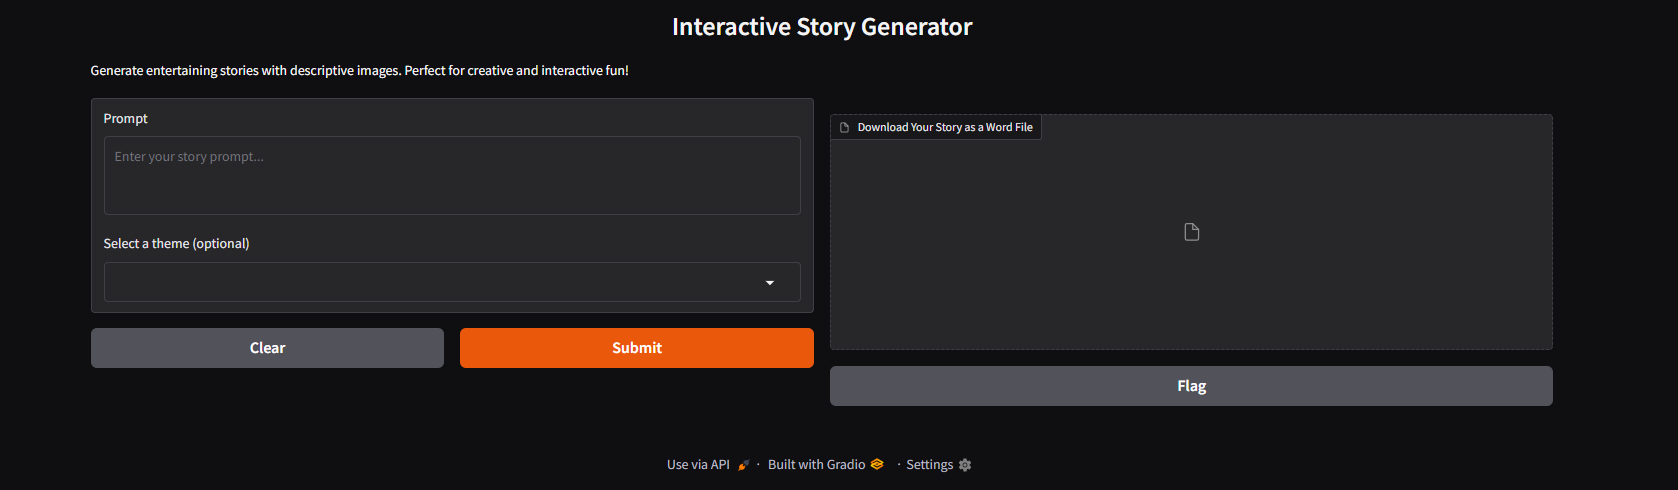
Interactive Story Generator with Image Enhancement
This project is an Interactive Story Generator that creates engaging and descriptive stories based on user-provided prompts and themes. The application enhances the generated stories by appending relevant images for a visually immersive experience. Designed to encourage creativity and provide entertainment, this project is perfect for creating personalized picture books or story experiences for diverse audiences, including disabled individuals.


Key Features:
Story Generation:

Utilizes Groq API to generate compelling stories based on a user-provided prompt and an optional theme.
Includes a variety of pre-defined themes like "Adventure," "Fantasy," "Friendship," "Mystery," and "Nature."
SVO (Subject-Verb-Object) Extraction:

Extracts key subject-verb-object pairs from the generated story using spaCy.
Identifies the most relevant triplet using cosine similarity and a Sentence Transformer model for better context.
Image Search and Integration:

Performs robust Google Image searches to find images relevant to the extracted SVO pairs.
Appends these images to the story, creating a visual narrative.
Enhanced Output:

Outputs the enhanced story in a user-friendly format, with images embedded after each paragraph.
Provides an option to download the story as a Word document for offline access and sharing.
Gradio Interface:

Offers an intuitive web-based interface for users to input prompts, select themes, and view/download their personalized stories.
Error Handling:

Includes mechanisms to handle failures in story generation and image searches, ensuring a seamless user experience.
Technologies Used:
Gradio: For the interactive user interface.
Groq API: To generate high-quality descriptive stories.
spaCy: For Natural Language Processing, including SVO extraction and Named Entity Recognition (NER).
SentenceTransformer: To compute sentence embeddings and evaluate semantic similarity.
BeautifulSoup: For scraping Google Image search results.
python-docx: To save generated stories into downloadable Word documents.
scikit-learn: For cosine similarity calculations.
How It Works:
The user provides a prompt and optionally selects a theme.
The application generates a story using the Groq API.
SVO pairs are extracted from the story to identify the most contextually relevant elements.
A Google Image search is performed for the extracted SVO pair to find relevant images.
Images are appended to the story, resulting in an enhanced picture-book-style output.
The final story, along with the images, is available to download as a Word document.
Use Case:
This project can be used to entertain and engage individuals, especially those with disabilities, by creating visual stories that are easy to comprehend and enjoy. It can also be a powerful tool for educators, parents, and caregivers to create personalized content for their audience.

Interactive Gradio Interface:
Users can interact with the application through a simple Gradio interface that:

Accepts a story prompt.
Allows theme selection (optional).
Provides a markdown story with images and an option to download it as a Word document.
This project combines the power of storytelling and visuals to create memorable experiences for its users.


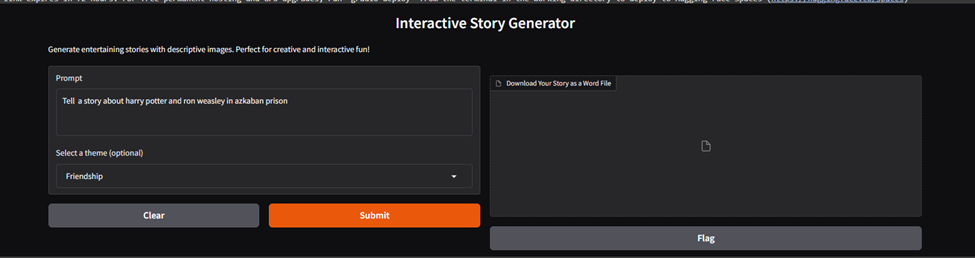













In [1]:
!pip install requests
!pip install spacy
!pip install beautifulsoup4
!pip install gradio
!pip install sentence-transformers
!python -m spacy download en_core_web_sm
!pip install groq
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by sel

In [ ]:
# Enhanced story generator web app for mental entertainment with debugging

import spacy
from bs4 import BeautifulSoup
import gradio as gr
from sentence_transformers import SentenceTransformer, util
import requests
import random

# Google Image Search URL Template
GOOGLE_IMAGE_SEARCH_URL = "https://www.google.com/search?hl=en&tbm=isch&q={query}"

# Groq API Details
GROQ_API_ENDPOINT = "https://api.groq.com/openai/v1/chat/completions"
GROQ_API_TOKEN = "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"  # Replace with your actual API token

# Initialize spaCy NLP model and Sentence Transformer
print("[DEBUG] Loading spaCy model and Sentence Transformer...")
nlp = spacy.load("en_core_web_sm")
embedder = SentenceTransformer("all-MiniLM-L6-v2")

import requests

def groq_request(prompt, model="llama3-8b-8192"):
    """
    Sends a request to the Groq API with the specified prompt and model.

    Args:
        prompt (str): The user's prompt or query.
        model (str): The model to use for generating the response.

    Returns:
        str: The response from the Groq API or an error message.
    """
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {GROQ_API_TOKEN}"
    }
    payload = {
        "model": model,
        "messages": [
            {
                "role": "user",
                "content": prompt
            }
        ]
    }

    print(f"[DEBUG] Sending request to Groq API: {url}")
    print(f"[DEBUG] Payload: {payload}")

    try:
        response = requests.post(url, headers=headers, json=payload)
        response.raise_for_status()
        response_data = response.json()
        print(f"[DEBUG] Groq API Response: {response_data}")

        # Extract and return content from response
        return response_data.get("choices", [{}])[0].get("message", {}).get("content", "No content returned.")
    except requests.exceptions.HTTPError as e:
        print(f"[DEBUG] HTTP Error: {e.response.text}")
        return f"Error generating story: {e.response.text}"
    except Exception as e:
        print(f"[DEBUG] Unexpected Error: {str(e)}")
        return f"Error generating story: {e}"


# Rest of the code remains unchanged

def extract_keywords(prompt, story):
    print(f"[DEBUG] Extracting keywords from prompt and story...")
    doc = nlp(prompt + " " + story)
    keywords = {ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC", "ORG", "PERSON", "PRODUCT"]}
    print(f"[DEBUG] Named entities extracted: {keywords}")
    keywords.update(token.text for token in doc if token.pos_ in ["NOUN", "VERB"] and token.dep_ in ["ROOT", "nsubj", "dobj"])
    print(f"[DEBUG] Final keywords after adding nouns and verbs: {keywords}")
    return list(keywords)

def search_google_images(query):
    print(f"[DEBUG] Searching Google Images for query: {query}")
    search_url = GOOGLE_IMAGE_SEARCH_URL.format(query=query)
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(search_url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")
        image_tags = soup.find_all("img")
        image_urls = [img["src"] for img in image_tags if "src" in img.attrs][:3]
        print(f"[DEBUG] Image URLs found: {image_urls}")
        return image_urls
    except Exception as e:
        print(f"[ERROR] Google Image Search failed: {e}")
        return []  # Return an empty list if image search fails

def generate_story(prompt, theme):
    print(f"[DEBUG] Generating story for prompt: '{prompt}' and theme: '{theme}'")
    task = f"Generate an engaging, descriptive, and positive story for the theme '{theme}' with the following prompt:{prompt}"
    return groq_request(task , model="llama3-8b-8192")

def append_images_to_story(story, keywords):
    print(f"[DEBUG] Appending images to story...")
    keyword_to_images = {kw: search_google_images(kw) for kw in keywords}
    paragraphs = story.split("\n")
    enhanced_story = ""
    for paragraph in paragraphs:
        print(f"[DEBUG] Processing paragraph: {paragraph}")
        enhanced_story += paragraph + "\n\n"
        for keyword in keywords:
            images = keyword_to_images.get(keyword, [])
            if images:
                print(f"[DEBUG] Adding image for keyword '{keyword}': {images[0]}")
                enhanced_story += f"![Image for {keyword}]({images[0]})\n\n"
    return enhanced_story

def gradio_interface(prompt, theme):
    print(f"[DEBUG] Received input: prompt='{prompt}', theme='{theme}'")
    if not prompt:
        print("[ERROR] No prompt provided.")
        return "Please provide a prompt to generate your story."
    if not theme:
        theme = random.choice(["Adventure", "Fantasy", "Friendship", "Mystery", "Nature"])
        print(f"[DEBUG] No theme selected. Randomly chosen theme: '{theme}'")
    story = generate_story(prompt, theme)
    if "Error" in story:
        print(f"[ERROR] Story generation failed with error: {story}")
        return story
    print(f"[DEBUG] Generated story: {story}")
    keywords = extract_keywords(prompt, story)
    print(f"[DEBUG] Extracted keywords: {keywords}")
    enhanced_story = append_images_to_story(story, keywords)
    print(f"[DEBUG] Final enhanced story: {enhanced_story}")
    return enhanced_story

# Define themes for the dropdown
themes = ["Adventure", "Fantasy", "Friendship", "Mystery", "Nature"]

# Gradio interface setup
print("[DEBUG] Setting up Gradio interface...")
interface = gr.Interface(
    fn=gradio_interface,
    inputs=[
        gr.Textbox(lines=3, placeholder="Enter your story prompt...", label="Prompt"),
        gr.Dropdown(choices=themes, label="Select a theme (optional)", value=None)
    ],
    outputs="markdown",
    title="Interactive Story Generator",
    description="Generate entertaining stories with descriptive images. Perfect for creative and interactive fun!"
)

# Launch the interface
print("[DEBUG] Launching Gradio interface...")
interface.launch()


[DEBUG] Loading spaCy model and Sentence Transformer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[DEBUG] Setting up Gradio interface...
[DEBUG] Launching Gradio interface...
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c89df433e9e524cb0c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


This **trial version** of the **StoryCanvas** creates interactive stories with embedded images for entertainment and mental engagement.

### Key Features:
1. **Story Creation**: Uses **Groq API** to generate creative stories based on user prompts and themes like Adventure or Mystery.
2. **Keyword-Based Images**: Extracts key entities with **spaCy** and fetches related images via Google Image Search.
3. **User Interface**: Built with **Gradio** for easy input (prompt, theme) and output (story with images).

### Limitations (Trial Version):
- Relies on Google Image Search (prone to blocks).
- Basic error handling and static API token.
- Experimental and unoptimized for production.

This prototype aims to test features and gather feedback for further development.

In [ ]:
def groq_request(prompt, model="llama3-8b-8192"):
    """
    Sends a request to the Groq API with the specified prompt and model.

    Args:
        prompt (str): The user's prompt or query.
        model (str): The model to use for generating the response.

    Returns:
        str: The response from the Groq API or an error message.
    """
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {GROQ_API_TOKEN}"
    }
    payload = {
        "model": model,
        "messages": [
            {
                "role": "user",
                "content": prompt
            }
        ]
    }

    print(f"[DEBUG] Sending request to Groq API: {url}")
    print(f"[DEBUG] Payload: {payload}")

    try:
        response = requests.post(url, headers=headers, json=payload)
        response.raise_for_status()
        response_data = response.json()
        print(f"[DEBUG] Groq API Response: {response_data}")

        # Extract and return content from response
        return response_data.get("choices", [{}])[0].get("message", {}).get("content", "No content returned.")
    except requests.exceptions.HTTPError as e:
        print(f"[DEBUG] HTTP Error: {e.response.text}")
        return f"Error generating story: {e.response.text}"
    except Exception as e:
        print(f"[DEBUG] Unexpected Error: {str(e)}")
        return f"Error generating story: {e}"
def test_groq_request():
    """
    Test the `groq_request` function with a sample prompt.
    """
    print("[TEST] Starting test for `groq_request` function...")

    # Sample prompt to test the function
    sample_prompt = "Tell me a short story about a brave knight and a dragon."

    # Call the groq_request function
    try:
        response = groq_request(prompt=sample_prompt, model="llama3-8b-8192")
        print("[TEST] Response from `groq_request` function:")
        print(response)
    except Exception as e:
        print("[TEST] An error occurred during the test:")
        print(str(e))

# Run the test
test_groq_request()


[TEST] Starting test for `groq_request` function...
[DEBUG] Sending request to Groq API: https://api.groq.com/openai/v1/chat/completions
[DEBUG] Payload: {'model': 'llama3-8b-8192', 'messages': [{'role': 'user', 'content': 'Tell me a short story about a brave knight and a dragon.'}]}
[DEBUG] Groq API Response: {'id': 'chatcmpl-69442c11-9e6f-4068-97b0-7a87bb03f7ab', 'object': 'chat.completion', 'created': 1732470461, 'model': 'llama3-8b-8192', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'Here\'s a short story about a brave knight and a dragon:\n\nIn the land of Azura, where the sun dipped into the horizon and painted the sky with hues of crimson and gold, a brave knight named Sir Edward rode forth to challenge the fiercest dragon in the realm. For years, the dragon, named Tharros, had terrorized the villages and towns, burning crops and reducing them to ashes. The people of Azura had grown weary of its reign of terror and begged Sir Edward to rid them of the bea

In [ ]:
import spacy
from sentence_transformers import SentenceTransformer, util
import requests
from bs4 import BeautifulSoup
import random

# Load spaCy model and SentenceTransformer model
nlp = spacy.load("en_core_web_sm")
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Function to extract Subject-Verb-Object (SVO) pairs from a sentence
def extract_svo_pairs(paragraph):
    doc = nlp(paragraph)
    svo_pairs = []

    # Extract SVO pairs from the sentence
    for token in doc:
        # Check for subject-verb-object relationship using dependency parsing
        if 'subj' in token.dep_ and token.head.pos_ == 'VERB':
            subj = token.text
            verb = token.head.text
            # Find the object for this subject-verb pair
            for child in token.head.children:
                if 'obj' in child.dep_:
                    obj = child.text
                    svo_pairs.append((subj, verb, obj))
    return svo_pairs

# Function to find the most relevant SVO pair based on cosine similarity
def find_most_relevant_svo(paragraph, svo_pairs):
    paragraph_embedding = embedder.encode(paragraph)
    max_score = -1
    best_svo = None
    best_svo_embedding = None

    for svo in svo_pairs:
        svo_text = ' '.join(svo)  # Concatenate the Subject-Verb-Object into a string
        svo_embedding = embedder.encode(svo_text)
        score = util.pytorch_cos_sim(paragraph_embedding, svo_embedding)

        if score > max_score:
            max_score = score
            best_svo = svo
            best_svo_embedding = svo_embedding

    return best_svo, best_svo_embedding

# Function to perform a robust image search for a given query
def robust_image_search(query):
    """
    Perform an image search for a given query. This function uses a simple request
    to simulate image search. You can integrate better search services such as SerpAPI or Google Custom Search.
    """
    print(f"[DEBUG] Searching for images for query: {query}")
    search_url = f"https://www.google.com/search?hl=en&tbm=isch&q={query}"
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(search_url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")
        image_tags = soup.find_all("img")
        image_urls = [img["src"] for img in image_tags if "src" in img.attrs][:3]  # Take top 3 image URLs
        print(f"[DEBUG] Image URLs found: {image_urls}")
        return image_urls
    except Exception as e:
        print(f"[ERROR] Image search failed: {e}")
        return []

# Function to append images to the story
def append_image_to_story(paragraph):
    svo_pairs = extract_svo_pairs(paragraph)
    if not svo_pairs:
        print("No SVO pairs found.")
        return paragraph

    best_svo, best_svo_embedding = find_most_relevant_svo(paragraph, svo_pairs)
    if best_svo:
        print(f"Most relevant SVO: {best_svo}")
        image_query = ' '.join(best_svo)  # Use the SVO pair as the search query for the image
        image_urls = robust_image_search(image_query)

        if image_urls:
            # Randomly select an image URL from the results
            image_url = random.choice(image_urls)
            # Append the image URL to the story
            result_paragraph = f"{paragraph}\n[Image: {image_url}]"
            return result_paragraph
        else:
            return f"{paragraph}\n[No relevant image found.]"
    else:
        return paragraph

# Test with an example
test_paragraph = "The cat chased the mouse across the room."
result = append_image_to_story(test_paragraph)
print(result)


Most relevant SVO: ('cat', 'chased', 'mouse')
[DEBUG] Searching for images for query: cat chased mouse
[DEBUG] Image URLs found: ['/images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT21uhBoiUOmRXgDcQivDrDPg5AkqSk9YHftc69_gLSCQoCjh6qfjjPKL5zSg&s', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAFr8IOc4MMLK_5ne2YgpvE_ZP4hNDkQohWYV16W5bSD5dPq38QM0bLeofLuM&s']
The cat chased the mouse across the room.
[Image: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT21uhBoiUOmRXgDcQivDrDPg5AkqSk9YHftc69_gLSCQoCjh6qfjjPKL5zSg&s]


This experimental code aims to enhance AI-generated stories by finding and appending the most fitting images from Google. It extracts Subject-Verb-Object (SVO) pairs from the text, identifies the most relevant one using semantic similarity, and performs an online image search.

---

### **How It Works**:
1. **Extract SVO Pairs**: Finds key subject, verb, and object relationships in the text (e.g., `('cat', 'chased', 'mouse')`).
2. **Find Relevance**: Scores SVO pairs for contextual relevance to the paragraph using `SentenceTransformer`.
3. **Image Search**: Queries Google for images matching the best SVO pair and appends the most relevant image URL to the story.
4. **Fallbacks**: Notes if no relevant images are found.

---

**Goal**: Experiment with a process to seamlessly match images to AI-generated stories for a richer, more engaging experience.

In [ ]:
import spacy
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load SpaCy for Dependency Parsing
nlp = spacy.load("en_core_web_sm")  # or en_core_web_md

# Load Sentence-BERT for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example paragraph
paragraph = """Alice decided to take a walk in the park to enjoy the fresh air and get some exercise. As she strolled along the path, she noticed a group of children playing with a frisbee near a large oak tree. Suddenly, one of the children, a little boy named Tim, threw the frisbee high into the air, and it flew toward Alice. She quickly reached out and caught it with both hands, smiling as she tossed it back to the children. Tim's face lit up with excitement, and he ran to retrieve the frisbee once again. After a few more throws, Alice said goodbye to the children and continued her walk, feeling grateful for the brief, pleasant interruption."""

# Step 1: Dependency Parsing to extract SVO pairs with better location detection
def extract_svo_pairs(paragraph):
    doc = nlp(paragraph)
    svo_pairs = []
    locations = []

    # Extract locations using named entity recognition
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:  # Geopolitical Entities or Locations
            locations.append(ent.text)

    for sent in doc.sents:
        subject = None
        verb = None
        object_ = None
        location = None

        # Extract SVO and Location from sentence
        for token in sent:
            if token.dep_ == "nsubj":  # Subject
                subject = token.text
            elif token.dep_ == "ROOT":  # Verb
                verb = token.text
            elif token.dep_ == "dobj":  # Direct Object
                object_ = token.text

        # If no location found in the sentence, we use the locations from the NER
        if locations:
            location = locations[0]  # Default to the first detected location (if any)

        if subject and verb and object_:
            # Include location in the SVO triplet if available
            svo_pairs.append((subject, verb, object_, location))

    return svo_pairs

# Step 2: Extract SVO pairs with location
svo_pairs = extract_svo_pairs(paragraph)

# Step 3: Get embeddings for the paragraph and each SVO-location pair
paragraph_embedding = model.encode(paragraph)
svo_embeddings = [model.encode(f"{s} {v} {o} {loc}" if loc else f"{s} {v} {o}") for s, v, o, loc in svo_pairs]

# Step 4: Compute cosine similarity between paragraph and each SVO-location pair
similarities = [cosine_similarity([paragraph_embedding], [embedding])[0][0] for embedding in svo_embeddings]

# Step 5: Get most relevant SVO-location pair based on cosine similarity
most_relevant_svo = svo_pairs[similarities.index(max(similarities))]
print(f"Most relevant SVO-location pair: {most_relevant_svo}")


Most relevant SVO-location pair: ('it', 'threw', 'frisbee', None)


This code extracts Subject-Verb-Object (SVO) pairs from a paragraph, incorporating location information through named entity recognition (NER). The main steps include:

1. **SVO Extraction**: It uses SpaCy's dependency parsing to extract SVO pairs.
2. **Location Detection**: Locations are identified through NER and included in the SVO pairs if found.
3. **Embeddings**: It encodes both the full paragraph and each SVO-location pair using **Sentence-BERT**.
4. **Cosine Similarity**: The paragraph embedding is compared with each SVO-location pair embedding to find the most relevant match.

### Difference from the Previous Code:
- **Location Awareness**: This version includes locations within the SVO pairs by leveraging NER to capture geographical references, unlike the previous code, which focused solely on general SVO pairs without location context.
- **Cosine Similarity with Locations**: This code uses **cosine similarity** to match the paragraph with enriched SVO-location pairs, whereas the previous version directly searches for relevant images based on SVO pairs without using similarity measures.


In [2]:
import spacy
from bs4 import BeautifulSoup
import gradio as gr
from sentence_transformers import SentenceTransformer, util
import requests
import random
from sklearn.metrics.pairwise import cosine_similarity

# Google Image Search URL Template
GOOGLE_IMAGE_SEARCH_URL = "https://www.google.com/search?hl=en&tbm=isch&q={query}"

# Groq API Details
GROQ_API_ENDPOINT = "https://api.groq.com/openai/v1/chat/completions"
GROQ_API_TOKEN = "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"  # Replace with your actual API token

# Initialize spaCy NLP model and Sentence Transformer
print("[DEBUG] Loading spaCy model and Sentence Transformer...")
nlp = spacy.load("en_core_web_sm")
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# SVO and cosine similarity functions from the first code
def extract_svo_pairs(paragraph):
    doc = nlp(paragraph)
    svo_pairs = []
    locations = []

    # Extract locations using named entity recognition
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:  # Geopolitical Entities or Locations
            locations.append(ent.text)

    for sent in doc.sents:
        subject = None
        verb = None
        object_ = None
        location = None

        # Extract SVO and Location from sentence
        for token in sent:
            if token.dep_ == "nsubj":  # Subject
                subject = token.text
            elif token.dep_ == "ROOT":  # Verb
                verb = token.text
            elif token.dep_ == "dobj":  # Direct Object
                object_ = token.text

        # If no location found in the sentence, we use the locations from the NER
        if locations:
            location = locations[0]  # Default to the first detected location (if any)

        if subject and verb and object_:
            # Include location in the SVO triplet if available
            svo_pairs.append((subject, verb, object_, location))

    return svo_pairs

def get_most_relevant_svo(paragraph):
    svo_pairs = extract_svo_pairs(paragraph)
    paragraph_embedding = embedder.encode(paragraph)
    svo_embeddings = [embedder.encode(f"{s} {v} {o} {loc}" if loc else f"{s} {v} {o}") for s, v, o, loc in svo_pairs]
    similarities = [cosine_similarity([paragraph_embedding], [embedding])[0][0] for embedding in svo_embeddings]
    most_relevant_svo = svo_pairs[similarities.index(max(similarities))]
    return most_relevant_svo

def robust_image_search(query, previous_query=None):
    """
    Perform an image search for a given query. If no images are found,
    retries with the previous query (if available).
    """
    print(f"[DEBUG] Searching for images for query: {query}")
    search_url = f"https://www.google.com/search?hl=en&tbm=isch&q={query}"
    headers = {"User-Agent": "Mozilla/5.0"}
    image_urls = []

    try:
        # Perform search for the primary query
        response = requests.get(search_url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")
        image_tags = soup.find_all("img")
        image_urls = [img["src"] for img in image_tags if "src" in img.attrs][:5]  # Get up to 5 images
        previous_query = query
    except Exception as e:
        print(f"[ERROR] Primary image search failed: {e}")

    # If no images are found, retry with the previous query
    if not image_urls and previous_query:
        print(f"[WARNING] No images found for query: {query}. Retrying with previous query: {previous_query}")
        search_url = f"https://www.google.com/search?hl=en&tbm=isch&q={previous_query}"
        try:
            response = requests.get(search_url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, "html.parser")
            image_tags = soup.find_all("img")
            image_urls = [img["src"] for img in image_tags if "src" in img.attrs][:5]
        except Exception as e:
            print(f"[ERROR] Secondary image search failed: {e}")

    if not image_urls:
        print("[ERROR] No images found after retries.")
    else:
        print(f"[DEBUG] Found image URLs: {image_urls}")

    return image_urls


# Groq request remains the same
def groq_request(prompt, model="llama3-8b-8192"):
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {GROQ_API_TOKEN}"
    }
    payload = {
        "model": model,
        "messages": [
            {
                "role": "user",
                "content": prompt
            }
        ]
    }

    print(f"[DEBUG] Sending request to Groq API: {url}")
    print(f"[DEBUG] Payload: {payload}")

    try:
        response = requests.post(url, headers=headers, json=payload)
        response.raise_for_status()
        response_data = response.json()
        print(f"[DEBUG] Groq API Response: {response_data}")

        return response_data.get("choices", [{}])[0].get("message", {}).get("content", "No content returned.")
    except requests.exceptions.HTTPError as e:
        print(f"[DEBUG] HTTP Error: {e.response.text}")
        return f"Error generating story: {e.response.text}"
    except Exception as e:
        print(f"[DEBUG] Unexpected Error: {str(e)}")
        return f"Error generating story: {str(e)}"

# Append images to story (one image per paragraph)
def append_images_to_story(story, image_urls):
    """
    Appends images to each paragraph of the story. If fewer images than paragraphs
    are available, images are reused in a cycle.
    """
    print("[DEBUG] Appending images to story...")

    # Normalize paragraph splitting to handle multiple newline types
    paragraphs = [para.strip() for para in story.split("\n") if para.strip()]
    enhanced_story = ""
    image_count = len(image_urls)

    if image_count == 0:
        print("[WARNING] No images available to append.")
        return story

    # Loop through each paragraph and add an image after each
    for i, paragraph in enumerate(paragraphs):
        enhanced_story += paragraph + "\n\n"
        image_idx = i % image_count  # Cycle through available images if fewer than paragraphs
        print(f"[DEBUG] Adding image {image_idx + 1} for paragraph {i + 1}: {image_urls[image_idx]}")
        enhanced_story += f"![Image for paragraph]({image_urls[image_idx]})\n\n"

    return enhanced_story


def generate_story(prompt, theme):
    print(f"[DEBUG] Generating story for prompt: '{prompt}' and theme: '{theme}'")
    task = f"Generate an engaging, descriptive, and positive story for the theme '{theme}' with the following prompt:{prompt}"
    return groq_request(task , model="llama3-8b-8192")

from docx import Document  # Import python-docx for Word file creation
import os  # For file handling

# Save story to Word file function
def save_story_to_word(story, filename="Generated_Story.docx"):
    """
    Saves the generated story to a Word file.
    """
    print("[DEBUG] Saving story to Word file...")
    document = Document()
    paragraphs = story.split("\n\n")  # Split paragraphs for better formatting

    for paragraph in paragraphs:
        document.add_paragraph(paragraph)

    document.save(filename)
    print(f"[DEBUG] Story saved to {filename}")
    return filename

def gradio_interface(prompt, theme):
    print(f"[DEBUG] Received input: prompt='{prompt}', theme='{theme}'")
    if not prompt:
        print("[ERROR] No prompt provided.")
        return "Please provide a prompt to generate your story."
    if not theme:
        theme = random.choice(["Adventure", "Fantasy", "Friendship", "Mystery", "Nature"])
        print(f"[DEBUG] No theme selected. Randomly chosen theme: '{theme}'")

    story = generate_story(prompt, theme)
    if "Error" in story:
        print(f"[ERROR] Story generation failed with error: {story}")
        return story
    print(f"[DEBUG] Generated story: {story}")

    most_relevant_svo = get_most_relevant_svo(story)
    print(f"[DEBUG] Most relevant SVO: {most_relevant_svo[:-1]}")
    query = " ".join(most_relevant_svo)  # excluding location as we assume location is in the query
    print(f"[INFO] Querying images for: {query}")

    image_urls = robust_image_search(query)
    print(f"[DEBUG] Found image URLs: {image_urls}")

    # Append images to the generated story
    enhanced_story = append_images_to_story(story, image_urls)
    print(f"[DEBUG] Final enhanced story: {enhanced_story}")

    # Save enhanced story to a Word file
    word_file_path = save_story_to_word(enhanced_story)

    return enhanced_story, word_file_path

themes = ["Adventure", "Fantasy", "Friendship", "Mystery", "Nature"]
# Update Gradio interface to include file download
interface = gr.Interface(
    fn=gradio_interface,
    inputs=[
        gr.Textbox(lines=3, placeholder="Enter your story prompt...", label="Prompt"),
        gr.Dropdown(choices=themes, label="Select a theme (optional)", value=None)
    ],
    outputs=[
        "markdown",  # Enhanced story in markdown format
        gr.File(label="Download Your Story as a Word File")  # File download output
    ],
    title="Interactive Story Generator",
    description="Generate entertaining stories with descriptive images. Perfect for creative and interactive fun!"
)

# Launch the interface
print("[DEBUG] Launching Gradio interface...")
interface.launch()



[DEBUG] Loading spaCy model and Sentence Transformer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[DEBUG] Launching Gradio interface...
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4a2eaaf5a62fb6be94.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
